## Part 2: PD Model, Performances, Scorecard and Cutoffs

#### Probability of default, PD

- Logistic regression with the use of scikit learn library

- Probability of default means the likelihood that a borrower will default on debt (credit card, mortgage or non-mortgage loan) over a one-year period.In simple words, it returns the expected probability of customers fail to repay the loan.

- Probability is expressed in the form of percentage, lies between 0% and 100%. Higher the probability, higher the chance of default.

#### Scorecard

A scorecard needs to be easily interpretable by a layperson. It is a requirement imposed by the Basel Accord, almost all central banks, and various lending entities. Given the high monetary and non-monetary misclassification costs, it is achieved by a scorecard that use discretized variables even for any continuous variables. Therefore, differences between low and high scores can be easily explained to third parties.

#### Loan Approval Cut-offs

Borrowers with a credit score higher than the set cut-off point will be accepted for loans and those less than the cutoff point will be rejected. It serves as a fine balance between the expected loan approval and rejection rates.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import roc_curve, roc_auc_score
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
X_train = pd.read_csv('X_train.csv', index_col = 0)
y_train = pd.read_csv('y_train.csv', index_col = 0)
X_test = pd.read_csv('X_test.csv', index_col = 0)
y_test = pd.read_csv('y_test.csv', index_col = 0)

### Explore data

In [3]:
X_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
y_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [5]:
X_train.shape

(373028, 324)

In [6]:
y_train.shape

(373028, 1)

In [7]:
X_test.shape

(93257, 324)

In [8]:
y_test.shape

(93257, 1)

### Feature Selection

For each feature, dummy variables were created in data table. For example, for grades, we have 7 columns for Grades from Grade:A to Grade:G. Each column consists of values 1 or 0.

eg. for Grades=A, we use 0 Non and 1 True (Grade A)
We only need 7 - 1 columns in our prediction model.

In this case, the reference category is Grade:G

In [9]:
# Here we select a limited set of input variables                                           
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earlieast_cr_line:<140',
'mths_since_earlieast_cr_line:141-164',
'mths_since_earlieast_cr_line:165-247',
'mths_since_earlieast_cr_line:248-270',
'mths_since_earlieast_cr_line:271-352',
'mths_since_earlieast_cr_line:>352',
'mths_since_issue_d: <38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-84',
'mths_since_issue_d: >84',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d: >84',
'int_rate:>20.281',
'mths_since_earlieast_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
X_train = X_train.loc[:, features_all]
X_train = X_train.drop(ref_categories, axis = 1)

In [12]:
X_train.shape

(373028, 104)

### PD Model Estimation

In [13]:
class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        # Convert X, y to numpy arrays of float / int
        if hasattr(X, "values"):  # if it's a pandas DataFrame
            X = X.values
        X = X.astype(float)

        if hasattr(y, "values"):  # if it's a pandas Series
            y = y.values

        self.model.fit(X, y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T

        F_ij = np.dot((X / denom).T, X)  # Fisher Information Matrix
        F_ij = F_ij.astype(float)        # make sure it's float

        Cramer_Rao = np.linalg.inv(F_ij)  # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))

        z_scores = self.model.coef_[0] / sigma_estimates  # z-score for each coef
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]  # two-tailed
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values


In [14]:
reg = LogisticRegression_with_p_values()

In [15]:
reg.fit(X_train, y_train)

In [16]:
feature_name = X_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
# We take the result of the newly added method 'p_values'
p_values = reg.p_values
# Adding the intercept for completeness. We add the value 'NaN' in the beginning of the variable with p-values.
p_values = np.append(np.nan, np.array(p_values))
# Adding a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table['p_values'] = p_values

summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.331095,NaN
1,grade:A,1.160081,1.709501e-37
2,grade:B,0.906048,1.041206e-49
3,grade:C,0.708859,6.554692e-36
4,grade:D,0.519060,4.998316e-22
...,...,...,...
100,mths_since_last_record:3-20,0.435606,6.076333e-04
101,mths_since_last_record:21-31,0.364478,1.780913e-03
102,mths_since_last_record:32-80,0.527064,5.047885e-09
103,mths_since_last_record:81-86,0.201847,5.755180e-02


We can see that the following variables do not have much statistical significance:

- mths_since_earliest_cr_line
- delinq_2yrs
- open_acc
- total_acc
- mths_since_last_delinq
- mths_since_last_record

In [17]:
# We commented on some features, the coefficients for all or almost all of the dummy variables for which, are not statistically significant.
# Refined variables
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
#'mths_since_earliest_cr_line:141-164',
#'mths_since_earliest_cr_line:165-247',
#'mths_since_earliest_cr_line:248-270',
#'mths_since_earliest_cr_line:271-352',
#'mths_since_earliest_cr_line:>352',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
#'open_acc:0',
#'open_acc:1-3',
#'open_acc:4-12',
#'open_acc:13-17',
#'open_acc:18-22',
#'open_acc:23-25',
#'open_acc:26-30',
#'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
#'total_acc:<=27',
#'total_acc:28-51',
#'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
#'mths_since_last_delinq:Missing',
#'mths_since_last_delinq:0-3',
#'mths_since_last_delinq:4-30',
#'mths_since_last_delinq:31-56',
#'mths_since_last_delinq:>=57',
#'mths_since_last_record:Missing',
#'mths_since_last_record:0-2',
#'mths_since_last_record:3-20',
#'mths_since_last_record:21-31',
#'mths_since_last_record:32-80',
#'mths_since_last_record:81-86',
#'mths_since_last_record:>=86',
]

In [18]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
#'delinq_2yrs:>=4',
'inq_last_6mths:>6',
#'open_acc:0',
'pub_rec:0-2',
#'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35'
#'mths_since_last_delinq:0-3',
#'mths_since_last_record:0-2'
]

In [19]:
X_train = pd.read_csv('X_train.csv', index_col = 0)

In [20]:
#loading values of df in a new dataframe.   
X_train_refined = X_train.loc[: , features_all]

# we drop the variables with reference categories.
X_train_refined = X_train_refined.drop(ref_categories, axis = 1)

In [21]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(X_train_refined, y_train)

In [22]:
feature_name = X_train_refined.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-0.814514,NaN
1,grade:A,0.439412,4.198076e-07
2,grade:B,0.552751,1.464341e-21
3,grade:C,0.508389,8.406966e-21
4,grade:D,0.438398,4.021486e-17
...,...,...,...
67,dti:10.5-16.1,-0.144861,9.922862e-03
68,dti:16.1-20.3,-0.247354,1.098719e-05
69,dti:20.3-21.7,-0.259843,1.056486e-05
70,dti:21.7-22.4,-0.296897,2.582042e-06


In [23]:
# Save model
import pickle
pickle.dump(reg2, open('pd_model.sav', 'wb'))

### AUC

In [24]:
X_test_refined = X_test.loc[:, features_all].drop(ref_categories, axis = 1)

In [25]:
y_predict_test = reg2.model.predict(X_test_refined)

In [26]:
y_proba_test = reg2.model.predict_proba(X_test_refined)

In [27]:
y_proba_test = y_proba_test[:][:,1]

In [28]:
y_test_temp = y_test.reset_index(drop = True)

In [29]:
df_actual_predicted_probs = pd.concat([y_test_temp, pd.DataFrame(y_proba_test)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = X_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.892673
288564,1,0.839759
213591,1,0.919735
263083,1,0.918838
165001,1,0.966737


In [30]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [31]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7378,2812
1,37752,45315


In [32]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.079115,0.030153
1,0.404817,0.485915


In [33]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5650299709405192

In [34]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

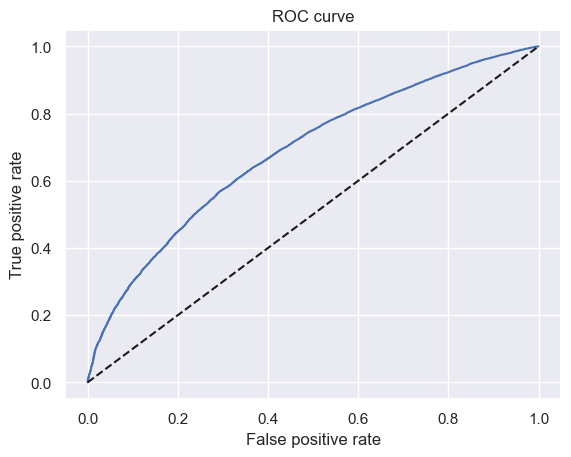

In [35]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [36]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6861062519108421

### Gini Coefficient

In [37]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba').reset_index()

In [38]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [39]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

Text(0.5, 1.0, 'Gini')

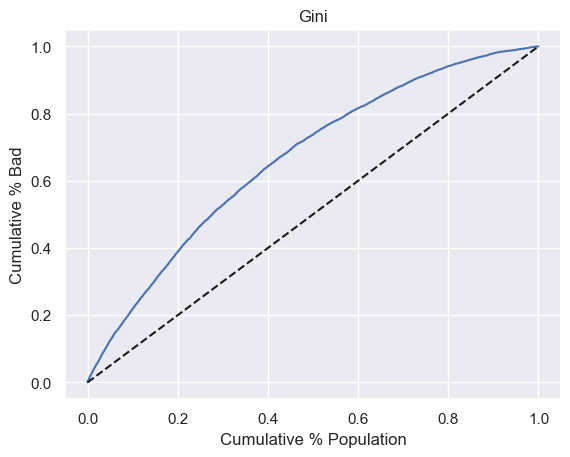

In [40]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')

In [41]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.37221250382168414

### Kolmogorov-Smirnov coefficient

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

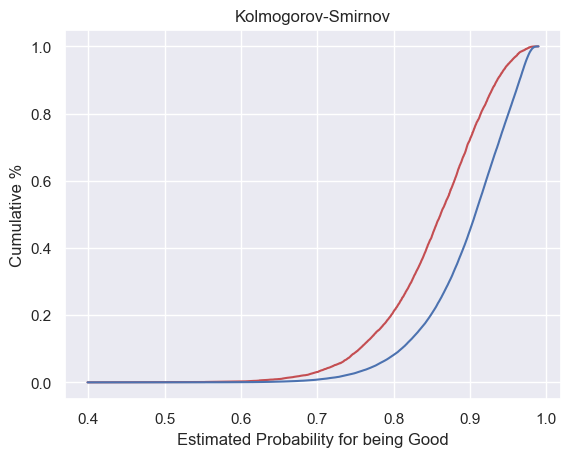

In [42]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [43]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.27527628624932193

#### Create Scorecard

In [44]:
df_ref_categories = pd.DataFrame(ref_categories,columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

df_scorecard = pd.concat ([summary_table, df_ref_categories ])
df_scorecard = df_scorecard.reset_index()

df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.814514,NaN,Intercept
1,1,grade:A,0.439412,4.198076e-07,grade
2,2,grade:B,0.552751,1.464341e-21,grade
3,3,grade:C,0.508389,8.406966e-21,grade
4,4,grade:D,0.438398,4.021486e-17,grade


In [45]:
min_score = 300
max_score = 850

In [46]:
#determining the ratio to multiply with the coefficients so that 
# min_score is equal to 300 and max_score is equal to 850
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
ratio_ = (max_score-min_score) / (max_sum_coef - min_sum_coef)
#calculating scores from coefs
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * ratio_
#replacing intercept coef
df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] -\
                                           min_sum_coef)*ratio_+ min_score
#rounding the scores to integer like
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.814514,NaN,Intercept,329.921225,330.0
1,1,grade:A,0.439412,4.198076e-07,grade,35.389717,35.0
2,2,grade:B,0.552751,1.464341e-21,grade,44.517900,45.0
3,3,grade:C,0.508389,8.406966e-21,grade,40.945034,41.0
4,4,grade:D,0.438398,4.021486e-17,grade,35.308076,35.0


In [47]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#let's check which index value to increase
df_scorecard['Difference'] =  df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
#let's print out the max scores of each feature
df_scorecard.loc[df_scorecard.groupby(['Original feature name'])['Score - Final'].idxmax()]

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final,Difference
0,0,Intercept,-0.814514,NaN,Intercept,329.921225,330.0,330.0,0.078775
44,44,acc_now_delinq:>=1,0.161133,8.202582e-02,acc_now_delinq,12.977482,13.0,13.0,0.022518
21,21,addr_state:WV_NH_WY_DC_ME_ID,0.511206,4.755606e-22,addr_state,41.171949,41.0,41.0,-0.171949
61,61,annual_inc:120K-140K,0.537967,2.635654e-25,annual_inc,43.327226,43.0,43.0,-0.327226
65,65,dti:3.5-7.7,-0.000915,9.875640e-01,dti,-0.073677,-0.0,-0.0,0.073677
34,34,emp_length:10,0.118887,7.612873e-11,emp_length,9.575049,10.0,10.0,0.424951
2,2,grade:B,0.552751,1.464341e-21,grade,44.517900,45.0,45.0,0.482100
7,7,home_ownership:OWN,0.124618,4.754588e-10,home_ownership,10.036614,10.0,10.0,-0.036614
28,28,initial_list_status:w,0.290605,6.298866e-129,initial_list_status,23.405023,23.0,23.0,-0.405023
39,39,inq_last_6mths:0,1.111689,5.813350e-54,inq_last_6mths,89.534132,90.0,90.0,0.465868


In [61]:
df_scorecard.to_csv('df_scorecard.csv')

#### Calculate Credit Score

In [48]:
inputs_test_with_ref_cat = X_test.loc[:, features_all]

In [49]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [50]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [51]:
scorecard_scores = df_scorecard['Score - Final']

In [52]:
scorecard_scores = scorecard_scores.values.reshape(87, 1)

In [53]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [54]:
y_scores.head()

,0
362514,567.0
288564,530.0
213591,593.0
263083,592.0
165001,668.0


### From Credit Score to PD

In [55]:
coef_ = (max_sum_coef - min_sum_coef) / (max_score - min_score)
# Make sure y_scores is numeric
if isinstance(y_scores, pd.DataFrame):
    y_index = y_scores.index
    y_scores_1d = y_scores.iloc[:, 0].astype(float)
elif isinstance(y_scores, pd.Series):
    y_index = y_scores.index
    y_scores_1d = y_scores.astype(float)
else:  # numpy array or list
    y_index = None
    y_scores_1d = np.asarray(y_scores, dtype=float)

sum_coef_from_score = (y_scores_1d - min_score) * coef_ + min_sum_coef

# Convert to 1D float array
vals = np.asarray(sum_coef_from_score, dtype=float).ravel()

# Logistic transform
y_hat_vals = np.exp(vals) / (1 + np.exp(vals))

# Make a Series (1D)
y_hat_proba_from_score = pd.Series(y_hat_vals, index=y_index)

y_hat_proba_from_score.head()

362514    0.893704
288564    0.841541
213591    0.920705
263083    0.919794
165001    0.967175
dtype: float64

### Setting Cutoff

In [56]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,39810,0,0.398915,0,1,0,1,0.000011,0.000000,0.000098
1,40518,0,0.420621,0,2,0,2,0.000021,0.000000,0.000196
2,40173,0,0.447833,0,3,0,3,0.000032,0.000000,0.000294
3,41760,1,0.469404,0,4,1,3,0.000043,0.000012,0.000294
4,42344,1,0.473183,0,5,2,3,0.000054,0.000024,0.000294


In [57]:
# Getting ROC Curve and their predicted probabilities.
# It returns us the false positive rates, the true positive rates, and the thresholds.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],\
          df_actual_predicted_probs['y_hat_test_proba'])
# Conconating 3 dataframes along the columns.
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# Naming the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [58]:
# Let the 1st threshold (the value of the thresholds column with index 0) be equal 
# very close to 1 but smaller than 1
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 20)

# The score corresponding to each threshold equals:
ratio_ = (max_score-min_score) / (max_sum_coef - min_sum_coef)
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ratio_ + min_score).round()
df_cutoffs['Score'][0] = max_score

In [59]:
# defining a function called 'n_approved' which assigns a value of 1 if a predicted probability
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

# With the assumption that a given probability of being 'good' will be approved,
# we obtain # of approved applications.
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

# Calculating # of rejected applications for each threshold.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

# Approval rate = the ratio of the apprv'd apps and all apps.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

# Rejection rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [60]:
# displaying the df with cutoffs form l/ w ind 5600 to l/ w ind 5650.
df_cutoffs.iloc[5000:5650,:]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.908575,0.226889,0.486487,580.0,42723,50534,0.458121,0.541879
5001,0.908560,0.226889,0.486571,580.0,42730,50527,0.458196,0.541804
5002,0.908559,0.226987,0.486571,580.0,42731,50526,0.458207,0.541793
5003,0.908494,0.226987,0.487065,580.0,42772,50485,0.458647,0.541353
5004,0.908494,0.226987,0.487089,580.0,42774,50483,0.458668,0.541332
...,...,...,...,...,...,...,...,...
5645,0.902882,0.259666,0.526358,575.0,46369,46888,0.497217,0.502783
5646,0.902881,0.259764,0.526358,575.0,46370,46887,0.497228,0.502772
5647,0.902874,0.259764,0.526418,575.0,46375,46882,0.497282,0.502718
5648,0.902871,0.259863,0.526418,575.0,46376,46881,0.497292,0.502708
